The dataset for the thesis is taken from https://www.kaggle.com/datasets/carrie1/ecommerce-data. This is actual sales data for the period 12/01/2010 - 12/09/2011 of an international online store registered and based in the UK. The store sells unique gifts for all occasions. Many buyers are wholesalers.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data.csv', encoding = 'latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


So, what is it about? This a list of purchases in an online store for a certain period of time. Each line - the line of which invoice, where it is: invoice number, warehouse code of goods, product name, number of units of goods, invoice date, price, buyer ID, buyer's country.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


What I want to do? 1) change the InvoiceDate format to datetime, and CustomerID to object 2) Figure out what to do with NaN values of the Description and CustomerID fields so that I can use aggregators for analysis purposes.

In [7]:
from datetime import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format= '%m/%d/%Y %H:%M')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.loc[pd.isnull(df.Description), :].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 622 to 538554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1454 non-null   object        
 1   StockCode    1454 non-null   object        
 2   Description  0 non-null      object        
 3   Quantity     1454 non-null   int64         
 4   InvoiceDate  1454 non-null   datetime64[ns]
 5   UnitPrice    1454 non-null   float64       
 6   CustomerID   0 non-null      float64       
 7   Country      1454 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 102.2+ KB


In [10]:
df.loc[pd.isnull(df.Description), :].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In price column is the value always = 0 when NaN in Description?

In [11]:
df[(pd.isnull(df.Description)) & (df.UnitPrice != 0.0)].UnitPrice.count()

0

It turns out that there are only 1454 lines with Description = NaN, that is, 0.27% of the total number of lines, these lines also have CustomerID NaN and zero price is indicated. That is: 1) their insignificant number. 2) In three positions of these lines there is no information necessary for our tasks. Perhaps they were draft invoices. You can delete them for analysis purposes.

In [12]:
df_dropna = df.loc[~pd.isnull(df.Description), :]
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [13]:
"""Let's check"""
df_dropna.loc[pd.isnull(df_dropna.Description), :].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [14]:
"""There are much more NaNs in the CustomerID column:"""
df_dropna[pd.isnull(df_dropna.CustomerID)].InvoiceNo.count()

133626

In [15]:
"""They cannot be so easily removed, especially since there are other, possibly interesting data.
Let's assume that these are offline buyers. We can replace such CustomerID with "no_info"""
df_dropna['CustomerID'] = df_dropna['CustomerID'].fillna('no_info')
df_dropna.info()

<ipython-input-15-4e983006b253>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['CustomerID'] = df_dropna['CustomerID'].fillna('no_info')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   540455 non-null  object        
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 37.1+ MB


In [16]:
"""What are there the zero prices? We will not be able to use this data for commercial analysis either."""
df_dropna.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


There are negative and zero quantities and prices

In [17]:
df_dropna[(df_dropna.UnitPrice <= 0.0) ].UnitPrice.count()

1063

In [18]:
df_dropna[(df_dropna.UnitPrice <= 0.0)].groupby('Description').count()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
OVAL WALL MIRROR DIAMANTE,1,1,1,1,1,1,1
20713,1,1,1,1,1,1,1
20713 wrongly marked,1,1,1,1,1,1,1
36 FOIL STAR CAKE CASES,1,1,1,1,1,1,1
4 TRADITIONAL SPINNING TOPS,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
wrongly marked carton 22804,1,1,1,1,1,1,1
wrongly marked. 23343 in box,1,1,1,1,1,1,1
wrongly sold (22719) barcode,1,1,1,1,1,1,1


The description is rather strange, the number of positions is small 0.2%. It can be understood that these are some losses and costs, judging by the description, but since the price is zero, it is not clear how these costs can be singled out and what conclusions can be drawn. They can be removed too.

In [19]:
df_dropna = df_dropna.loc[df_dropna.UnitPrice > 0.0, :]
df_dropna.describe()

,Quantity,UnitPrice
count,539392.000000,539392.000000
mean,9.845904,4.673648
std,215.412652,94.614722
min,-80995.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [20]:
"""Now to the negative and zero count, there is more of it:"""
df_dropna[(df_dropna.Quantity < 0.0)].InvoiceNo.count()

9288

In [21]:
df_dropna[df_dropna.Quantity == 0.0].InvoiceNo.count()

0

In [22]:
df_dropna[df_dropna.Quantity < 0.0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [23]:
df_dropna[(df_dropna.Quantity < 0.0) & (df_dropna.Description == 'Discount')].InvoiceNo.count()

77

In [24]:
df_dropna[df_dropna.Description == 'Discount'].InvoiceNo.count()

77

In [25]:
df_dropna['Total'] = df_dropna['UnitPrice']*df_dropna['Quantity']
df_dropna[df_dropna.Description == 'Discount'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom,-5.76


In [26]:
df_dropna[df_dropna.Description == 'Discount'].Total.sum()

-5696.219999999999

In [27]:
(df_dropna[df_dropna.Description == 'Discount'].Total.sum()/df_dropna[df_dropna.Description != 'Discount'].Total.sum())*100

-0.05826996283326249

In [28]:
"""Let's create a separate file with discounts:"""
df_discount = df_dropna[df_dropna.Description == 'Discount']
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 141 to 516455
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    77 non-null     object        
 1   StockCode    77 non-null     object        
 2   Description  77 non-null     object        
 3   Quantity     77 non-null     int64         
 4   InvoiceDate  77 non-null     datetime64[ns]
 5   UnitPrice    77 non-null     float64       
 6   CustomerID   77 non-null     object        
 7   Country      77 non-null     object        
 8   Total        77 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 6.0+ KB


In [29]:
"""Remove rows with discounts from the main dataset"""
df_dropna = df_dropna.loc[df_dropna.Description != 'Discount', :]
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539315 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    539315 non-null  object        
 1   StockCode    539315 non-null  object        
 2   Description  539315 non-null  object        
 3   Quantity     539315 non-null  int64         
 4   InvoiceDate  539315 non-null  datetime64[ns]
 5   UnitPrice    539315 non-null  float64       
 6   CustomerID   539315 non-null  object        
 7   Country      539315 non-null  object        
 8   Total        539315 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 41.1+ MB


"""Are there other non-grocery items?"""

In [30]:
import re

In [31]:
"""Let's generate a file with non-product positions based on the StockCode without numbers"""
df_dropna_no_product = df_dropna[~df_dropna.StockCode.str.contains('\d')]
df_dropna_no_product.groupby(['StockCode','Description']).agg(['count','sum']).Total                               

,,count,sum
StockCode,Description,,
AMAZONFEE,AMAZON FEE,34,-221520.500
B,Adjust bad debt,1,11062.060
BANK CHARGES,Bank Charges,37,-7175.639
CRUK,CRUK Commission,16,-7933.430
DCGSSBOY,BOYS PARTY BAG,11,150.550
DCGSSGIRL,GIRLS PARTY BAG,13,144.430
DOT,DOTCOM POSTAGE,707,206245.480
M,Manual,565,-68674.190
PADS,PADS TO MATCH ALL CUSHIONS,3,0.003


In [32]:
"""Party Bag and Pads look like grocery bags, let's get them out of here: contain the letter combination PA""" 
df_dropna_no_product = df_dropna[(~df_dropna.StockCode.str.contains('\d')) & (~df_dropna.Description.str.contains('PA'))]
df_dropna_no_product.groupby(['Description']).agg(['count', 'sum']).Total

,count,sum
Description,,
AMAZON FEE,34,-221520.500
Adjust bad debt,1,11062.060
Bank Charges,37,-7175.639
CRUK Commission,16,-7933.430
DOTCOM POSTAGE,707,206245.480
Manual,566,-68671.640
POSTAGE,1252,66230.640
SAMPLES,63,-3049.390


In [33]:
df_dropna_no_product.InvoiceNo.count()

2676

In [34]:
df_dropna = df_dropna[(df_dropna.StockCode.str.contains('\d')) | (df_dropna.Description.str.contains('PA'))]
df_dropna.describe()

,Quantity,UnitPrice,Total
count,536639.000000,536639.000000,536639.000000
mean,9.886061,3.297442,18.262520
std,215.925492,4.565467,367.889413
min,-80995.000000,0.001000,-168469.600000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.840000
75%,10.000000,4.130000,17.400000
max,80995.000000,649.500000,168469.600000


In [35]:
"""Assume that the negative amount for which a separate invoice is generated
means return of goods. because there is a CustomerID, there is a price. All invoices can be requested
for some buyer to check: both purchase and return invoices must exist"""

df_dropna[(df_dropna.CustomerID == 15311) & (df_dropna.UnitPrice == 4.65)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom,55.80
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom,-4.65
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom,55.80
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom,-13.95
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom,55.80
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom,55.80
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom,-9.30


In [36]:
df_dropna[df_dropna.Quantity < 0].Total.sum()

-478789.18000000005

In [37]:
(df_dropna[df_dropna.Quantity < 0].Total.sum()/df_dropna[df_dropna.Quantity > 0].Total.sum())*100

-4.657858425490388

In [38]:
df_return = df_dropna[df_dropna.Quantity < 0]

In [39]:
df_dropna['InvoiceDay'] = df_dropna['InvoiceDate'].dt.date
df_dropna['InvoiceTime'] = df_dropna['InvoiceDate'].dt.time
df_dropna['InvoiceYear'] = df_dropna['InvoiceDate'].dt.year
df_dropna['InvoiceMonth'] = df_dropna['InvoiceDate'].dt.month
df_dropna['Weekday'] = df_dropna['InvoiceDate'].dt.weekday
df_dropna['WeekNumber'] = df_dropna['InvoiceDate'].dt.week
df_dropna.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvoiceDay,InvoiceTime,InvoiceYear,InvoiceMonth,Weekday,WeekNumber
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00,2010,12,2,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,08:26:00,2010,12,2,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,08:26:00,2010,12,2,48


In [40]:
"""Determine the start and end date of the sample"""
df_dropna.InvoiceDate.agg(['min', 'max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

ANALYTICS

PRODUCTS

In [41]:
df_dropna[df_dropna.Quantity > 0].Description.value_counts().count()

4019

In [42]:
df_dropna[df_dropna.Quantity > 0].Quantity.sum()

5577278

In [43]:
"""£ worth of goods sold excluding returns"""
df_dropna[df_dropna.Quantity > 0].Total.sum()

10279169.872999998

In [44]:
"""£ worth of goods sold, including returns made during this period"""
df_dropna.Total.sum()

9800380.693

In [45]:
Products_q = df_dropna.groupby('Description').sum()['Quantity'].sort_values(ascending=False).reset_index()
quant_total = df_dropna.Quantity.sum()
Products_q['%_from_QuantTotal'] = round((Products_q['Quantity']/quant_total)*100,2)
Products_q.head(10)

,Description,Quantity,%_from_QuantTotal
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,1.01
1,JUMBO BAG RED RETROSPOT,47359,0.89
2,ASSORTED COLOUR BIRD ORNAMENT,36381,0.69
3,POPCORN HOLDER,36334,0.68
4,PACK OF 72 RETROSPOT CAKE CASES,36039,0.68
5,WHITE HANGING HEART T-LIGHT HOLDER,35313,0.67
6,RABBIT NIGHT LIGHT,30680,0.58
7,MINI PAINT SET VINTAGE,26437,0.50
8,PACK OF 12 LONDON TISSUES,26111,0.49
9,PACK OF 60 PINK PAISLEY CAKE CASES,24753,0.47


In [46]:
Products_q.head(10)['%_from_QuantTotal'].sum()

6.66

In [47]:
Products_t = df_dropna.groupby('Description').sum()['Total'].sort_values(ascending=False).reset_index()
total_total = df_dropna.Total.sum()
Products_t['%_from_Total'] = round((Products_t['Total']/total_total)*100,2)
Products_t.head(10)

,Description,Total,%_from_Total
0,REGENCY CAKESTAND 3 TIER,164762.19,1.68
1,WHITE HANGING HEART T-LIGHT HOLDER,99668.47,1.02
2,PARTY BUNTING,98302.98,1.00
3,JUMBO BAG RED RETROSPOT,92356.03,0.94
4,RABBIT NIGHT LIGHT,66756.59,0.68
5,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94,0.65
6,ASSORTED COLOUR BIRD ORNAMENT,58959.73,0.60
7,CHILLI LIGHTS,53768.06,0.55
8,SPOTTY BUNTING,42065.32,0.43
9,JUMBO BAG PINK POLKADOT,41619.66,0.42


In [48]:
Products_t.head(10)['%_from_Total'].sum()

7.970000000000001

In [49]:
Products_t_10 = Products_t.set_index('Description').head(10)
Products_q_10 = Products_q.set_index('Description').head(10)

In [50]:
Products_10 = Products_q_10.merge(Products_t_10, on='Description', how='inner')
Products_10.head(20)

,Quantity,%_from_QuantTotal,Total,%_from_Total
Description,,,,
JUMBO BAG RED RETROSPOT,47359,0.89,92356.03,0.94
ASSORTED COLOUR BIRD ORNAMENT,36381,0.69,58959.73,0.60
WHITE HANGING HEART T-LIGHT HOLDER,35313,0.67,99668.47,1.02
RABBIT NIGHT LIGHT,30680,0.58,66756.59,0.68


CUSTOMERS

In [51]:
"Total number of online shoppers: 4334"
(df_dropna[(df_dropna.CustomerID != 'no_info') & (df_dropna.Quantity > 0)].
 CustomerID.value_counts().count())

4334

In [52]:
""" Top 10 online shoppers who bought the most items by quantity"""
(df_dropna[df_dropna.CustomerID != 'no_info'].groupby('CustomerID').sum()['Quantity'].
 sort_values(ascending=False).head(10))

CustomerID
14646.0    196556
12415.0     76946
14911.0     76931
17450.0     69041
18102.0     64124
17511.0     63014
13694.0     61808
14298.0     58021
14156.0     57026
16684.0     49391
Name: Quantity, dtype: int64

In [53]:
"""Top 10 online shoppers who bought the most items by quantity"""
(df_dropna[df_dropna.CustomerID != 'no_info'].groupby('CustomerID').
 sum()['Total'].sort_values(ascending=False).head(10))

CustomerID
14646.0    278778.02
18102.0    259657.30
17450.0    189735.53
14911.0    133007.13
12415.0    123638.18
14156.0    114505.32
17511.0     88138.20
16684.0     65920.12
13694.0     62924.10
15311.0     59419.34
Name: Total, dtype: float64

INVOICES

In [54]:
"""Statistical information on commodity items in the invoice on average:"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').count()['Description'].describe()

count    19776.000000
mean        26.695641
std         47.587520
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1113.000000
Name: Description, dtype: float64

In [55]:
"""What is the most common number of items in an invoice:"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').count()['Description'].mode()[0]

1

In [56]:
"""Statistics on the number of goods in invoices:"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').sum()['Quantity'].describe()

count    19776.000000
mean       282.022553
std        959.027666
min          1.000000
25%         71.000000
50%        153.000000
75%        298.000000
max      80995.000000
Name: Quantity, dtype: float64

In [57]:
"""The most frequently occurring number of items in an invoice"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').sum()['Quantity'].mode()[0]

1

In [58]:
"""Statistiques on the invoice price:"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').sum()['Total'].describe()

count     19776.000000
mean        519.780030
std        1764.095381
min           0.380000
25%         152.445000
50%         302.740000
75%         484.385000
max      168469.600000
Name: Total, dtype: float64

In [59]:
"""The most common invoice value:"""
df_dropna[df_dropna.Quantity > 0].groupby('InvoiceNo').sum()['Total'].mode()[0]

15.0

DISCOUNTS

In [60]:
"""The quantity of dicounts:"""
df_discount.InvoiceNo.count()

77

In [61]:
"""Total amount of the discounts"""
df_discount.Total.sum()

-5696.219999999999

In [62]:
"""Number of customers who received discounts:"""
df_discount.groupby('CustomerID').count().InvoiceNo.count()

24

In [63]:
"""Customers who received the biggest discounts:"""
df_discount.groupby('CustomerID').sum()['Total'].sort_values().head(10)

CustomerID
17940.0   -1987.86
14527.0    -688.84
15498.0    -510.82
14911.0    -434.51
13408.0    -345.39
17340.0    -267.12
13694.0    -247.00
14646.0    -206.40
16029.0    -192.04
13316.0    -162.24
Name: Total, dtype: float64

RETURNS

In [64]:
df_return.Quantity.sum()

-272032

In [65]:
df_return.Total.sum()

-478789.18000000005

In [66]:
(df_return.Total.sum()/df_dropna[df_dropna.Quantity > 0].Total.sum())*100

-4.657858425490388

In [67]:
df_return.groupby(['CustomerID','Description']).sum()['Quantity'].sort_values().head(10)

CustomerID  Description                        
16446.0     PAPER CRAFT , LITTLE BIRDIE           -80995
12346.0     MEDIUM CERAMIC TOP STORAGE JAR        -74215
15838.0     ROTATING SILVER ANGELS T-LIGHT HLDR    -9360
15749.0     FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114
16029.0     PINK BLUE FELT CRAFT TRINKET BOX       -2592
15749.0     GIN + TONIC DIET METAL SIGN            -2000
            WHITE HANGING HEART T-LIGHT HOLDER     -1930
16938.0     HERB MARKER BASIL                      -1515
16029.0     FELTCRAFT DOLL MOLLY                   -1440
15749.0     TEA TIME PARTY BUNTING                 -1300
Name: Quantity, dtype: int64

In [68]:
df_return.groupby('Description').count()['CustomerID'].sort_values(ascending=False).head(10)

Description
REGENCY CAKESTAND 3 TIER              181
JAM MAKING SET WITH JARS               87
SET OF 3 CAKE TINS PANTRY DESIGN       74
STRAWBERRY CERAMIC TRINKET BOX         55
ROSES REGENCY TEACUP AND SAUCER        54
RECIPE BOX PANTRY YELLOW DESIGN        47
WOOD 2 DRAWER CABINET WHITE FINISH     45
JUMBO BAG RED RETROSPOT                44
LUNCH BAG RED RETROSPOT                44
GREEN REGENCY TEACUP AND SAUCER        42
Name: CustomerID, dtype: int64

PRICES

In [69]:
df_dropna.UnitPrice.describe()

count    536639.000000
mean          3.297442
std           4.565467
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

In [70]:
df_dropna.groupby(['Description','UnitPrice']).sum()['Quantity'].reset_index()

,Description,UnitPrice,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,0.79,49
1,4 PURPLE FLOCK DINNER CANDLES,2.55,91
2,4 PURPLE FLOCK DINNER CANDLES,4.96,2
3,4 PURPLE FLOCK DINNER CANDLES,5.06,2
4,50'S CHRISTMAS GIFT BAG LARGE,1.04,400
...,...,...,...
14873,ZINC WIRE KITCHEN ORGANISER,20.79,3
14874,ZINC WIRE SWEETHEART LETTER TRAY,1.25,13
14875,ZINC WIRE SWEETHEART LETTER TRAY,3.29,31
14876,ZINC WIRE SWEETHEART LETTER TRAY,3.75,36


In [71]:
df_dropna[df_dropna.Quantity > 0].groupby(['Description','InvoiceYear', 'InvoiceMonth',
'InvoiceDate','UnitPrice']).sum()['Quantity'].reset_index()

,Description,InvoiceYear,InvoiceMonth,InvoiceDate,UnitPrice,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,2010,12,2010-12-01 12:49:00,2.55,2
1,4 PURPLE FLOCK DINNER CANDLES,2010,12,2010-12-05 10:52:00,2.55,12
2,4 PURPLE FLOCK DINNER CANDLES,2010,12,2010-12-20 13:43:00,5.06,2
3,4 PURPLE FLOCK DINNER CANDLES,2011,1,2011-01-05 15:56:00,2.55,1
4,4 PURPLE FLOCK DINNER CANDLES,2011,1,2011-01-26 13:20:00,2.55,1
...,...,...,...,...,...,...
515809,ZINC WIRE SWEETHEART LETTER TRAY,2011,11,2011-11-23 15:53:00,3.75,2
515810,ZINC WIRE SWEETHEART LETTER TRAY,2011,11,2011-11-24 14:06:00,3.75,1
515811,ZINC WIRE SWEETHEART LETTER TRAY,2011,11,2011-11-30 17:37:00,3.75,1
515812,ZINC WIRE SWEETHEART LETTER TRAY,2011,12,2011-12-07 08:38:00,1.25,8


In [72]:
df_dropna.groupby(['Description','UnitPrice']).sum()['Quantity'].reset_index().describe()

,UnitPrice,Quantity
count,14878.000000,14878.000000
mean,4.467554,356.583277
std,9.549680,1052.700636
min,0.001000,-9360.000000
25%,1.250000,9.000000
50%,2.550000,45.000000
75%,4.960000,228.000000
max,649.500000,27732.000000


In [73]:
"""How many countries are represented?"""
df_dropna.Country.value_counts().count()

38

In [74]:
"""Buyers from which countries make the main sales"""
total_by_country = (df_dropna.groupby('Country').sum()['Total'].
                    sort_values(ascending=False).reset_index())
total_by_country['Total'] = total_by_country['Total'].astype(int)
total_by_country_10 = total_by_country.head(10) 
total_by_country_10

,Country,Total
0,United Kingdom,8303879
1,Netherlands,283479
2,EIRE,264838
3,Germany,200808
4,France,182349
5,Australia,136989
6,Switzerland,52505
7,Spain,51765
8,Belgium,36662
9,Japan,35419


In [75]:
total_by_country_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  10 non-null     object
 1   Total    10 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 248.0+ bytes


In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from pylab import rcParams
rcParams['figure.figsize'] = 13,6


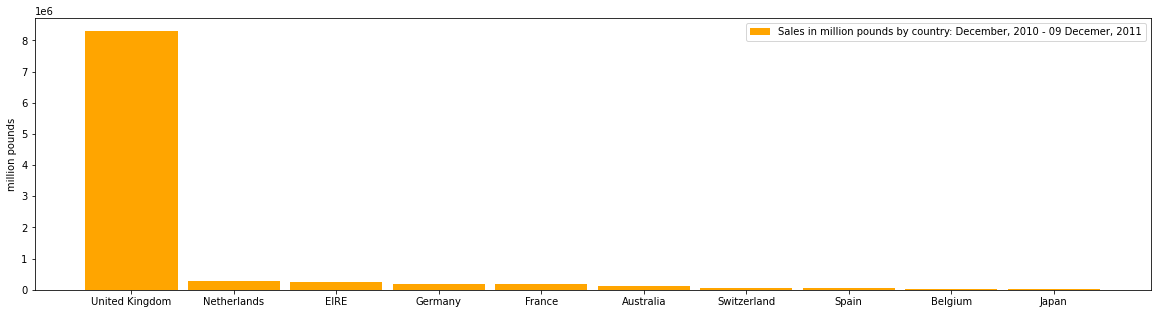

In [77]:
width = 0.9
fig, ax = plt.subplots(figsize=(20,5))

rects1 = ax.bar(total_by_country_10.Country, total_by_country_10['Total'],
width, color = 'orange', label='Sales in million pounds by country: December, 2010 - 09 Decemer, 2011')

ax.set_ylabel('million pounds')
ax.set_xticks(total_by_country_10.Country)
ax.legend()

In [78]:
"""Countries without United Kingdom"""
total_by_country_w_UK = (df_dropna[df_dropna.Country != 'United Kingdom'].groupby('Country').
                         sum()['Total'].sort_values(ascending=False).reset_index())
total_by_country_10_w_UK = total_by_country_w_UK.head(10) 
total_by_country_10_w_UK.head(10)

,Country,Total
0,Netherlands,283479.54
1,EIRE,264838.46
2,Germany,200808.40
3,France,182349.39
4,Australia,136990.00
5,Switzerland,52505.35
6,Spain,51765.20
7,Belgium,36662.96
8,Japan,35419.79
9,Sweden,35176.91


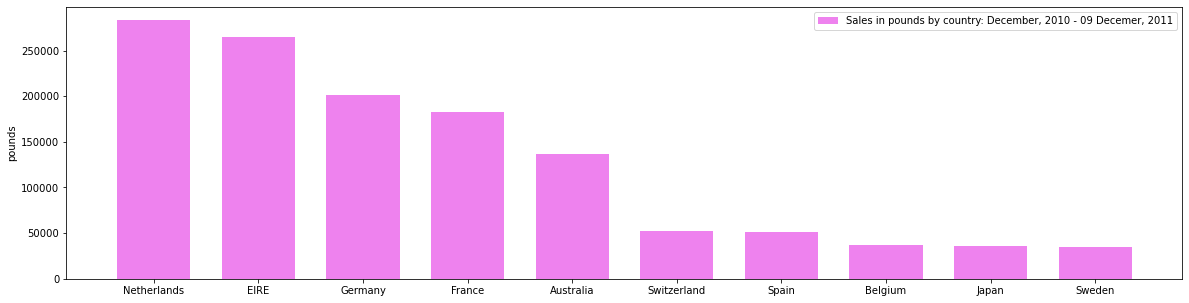

In [79]:
width = 0.7
fig, ax = plt.subplots(figsize=(20,5))

rects1 = ax.bar(total_by_country_10_w_UK.Country, total_by_country_10_w_UK['Total'],
width, color = 'violet', label='Sales in pounds by country: December, 2010 - 09 Decemer, 2011')

ax.set_ylabel('pounds')
ax.set_xticks(total_by_country_10_w_UK.Country)
ax.legend()

In [80]:
"% overseas sales in total sales (without UK)"
round((total_by_country_w_UK.sum()['Total']/total_by_country.sum()['Total'])*100, 2)

15.27

In [81]:
"""Number of different buyers by country"""
customers_by_country = (df_dropna[df_dropna.CustomerID != 'no_info'].groupby('Country').
                        nunique()['CustomerID'].sort_values(ascending=False).reset_index())
customers_by_country.head(10)

,Country,CustomerID
0,United Kingdom,3942
1,Germany,95
2,France,87
3,Spain,30
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,14
8,Finland,12
9,Austria,11


In [82]:
customers_by_country[customers_by_country.Country == 'EIRE']

,Country,CustomerID
24,EIRE,3


In [83]:
customers_by_country_EIRE = (df_dropna[df_dropna.CustomerID != 'no_info'].groupby('Country').
                        nunique()['CustomerID'].sort_values(ascending=False).reset_index())

In [84]:
customers_by_country[customers_by_country.Country == 'Australia']

,Country,CustomerID
13,Australia,9


DAYS OF WEEK

In [85]:
"""Distribution of sales by day of the week"""
dynamics_by_weekday = df_dropna[['Weekday', 'Total']].groupby('Weekday').sum()
dynamics_by_weekday.head(7)

,Total
Weekday,
0,1626944.430
1,1969812.791
2,1744116.940
3,2086424.870
4,1574762.341
6,798319.321


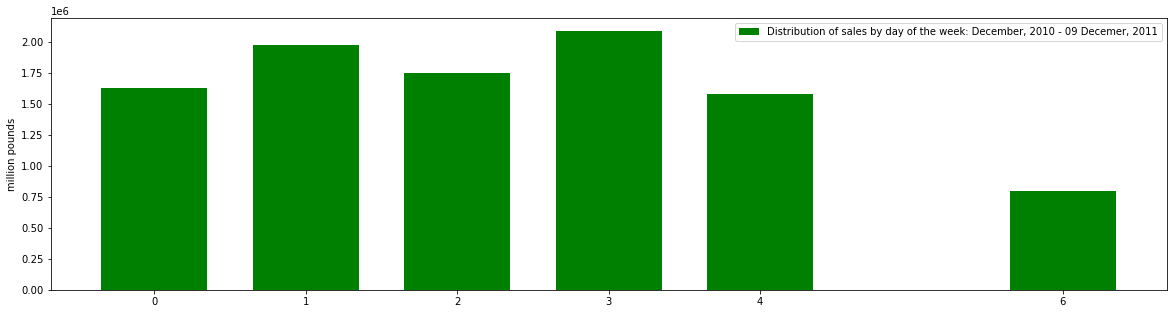

In [86]:
width = 0.7

fig, ax = plt.subplots(figsize=(20,5))

rects1 = ax.bar(dynamics_by_weekday.index, dynamics_by_weekday['Total'], width, color = 'green',
label='Distribution of sales by day of the week: December, 2010 - 09 Decemer, 2011')

ax.set_ylabel('million pounds')
ax.set_xticks(dynamics_by_weekday.index)
ax.legend()

In [87]:
dynamics_by_month = (df_dropna[['InvoiceYear', 'InvoiceMonth','Total']].
                          groupby(['InvoiceYear', 'InvoiceMonth',]).sum().reset_index())
dynamics_by_month

,InvoiceYear,InvoiceMonth,Total
0,2010,12,761000.500
1,2011,1,580616.110
2,2011,2,500792.000
3,2011,3,681340.640
4,2011,4,483392.881
5,2011,5,732763.510
6,2011,6,725651.040
7,2011,7,678538.531
8,2011,8,703075.640
9,2011,9,1014355.681


In [88]:
WorkDays_by_month = (df_dropna.groupby(['InvoiceYear','InvoiceMonth', 'InvoiceDay']).
                     sum()['Total'].reset_index())
WorkDays_by_month.groupby(['InvoiceYear','InvoiceMonth']).count()['InvoiceDay']

InvoiceYear  InvoiceMonth
2010         12              20
2011         1               24
             2               24
             3               27
             4               21
             5               25
             6               26
             7               26
             8               26
             9               26
             10              26
             11              26
             12               8
Name: InvoiceDay, dtype: int64

In [89]:
'Since there are different number of days in months, we look at the average daily sales by months'
dynamics_by_month['DaysofMonth'] = [20,24,24,27,21,25,26,26,26,26,26,26,8.5]
dynamics_by_month['TotalperDay'] = (dynamics_by_month['Total']
                                         /dynamics_by_month['DaysofMonth'])
dynamics_by_month

,InvoiceYear,InvoiceMonth,Total,DaysofMonth,TotalperDay
0,2010,12,761000.500,20.0,38050.025000
1,2011,1,580616.110,24.0,24192.337917
2,2011,2,500792.000,24.0,20866.333333
3,2011,3,681340.640,27.0,25234.838519
4,2011,4,483392.881,21.0,23018.708619
5,2011,5,732763.510,25.0,29310.540400
6,2011,6,725651.040,26.0,27909.655385
7,2011,7,678538.531,26.0,26097.635808
8,2011,8,703075.640,26.0,27041.370769
9,2011,9,1014355.681,26.0,39013.680038


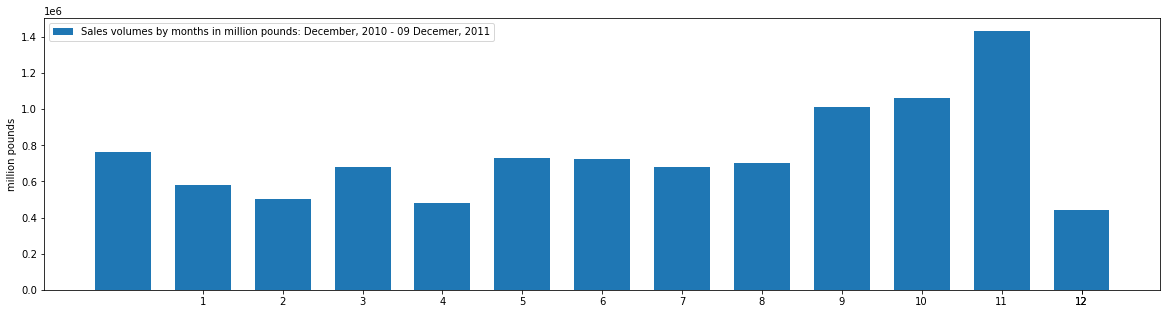

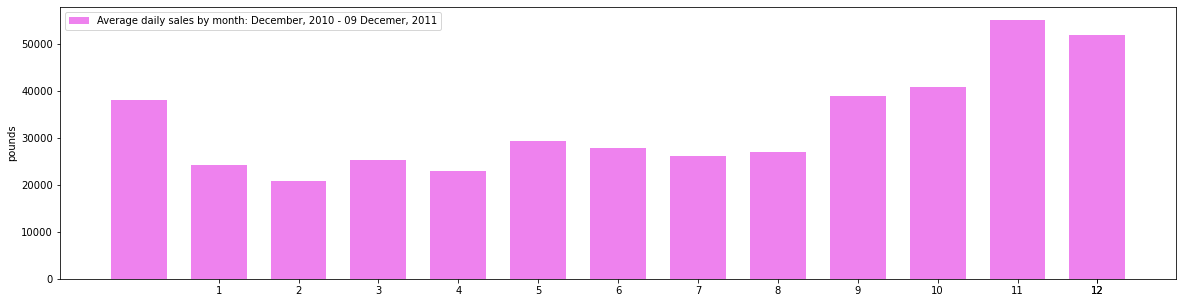

In [90]:
"plot both graphs, one below the other"

width = 0.7

fig, ax = plt.subplots(figsize=(20,5))

rects1 = (ax.bar(dynamics_by_month.index, dynamics_by_month['Total'], 
                width, label='Sales volumes by months in million pounds: December, 2010 - 09 Decemer, 2011'))

ax.set_ylabel('million pounds')
ax.set_xticks(dynamics_by_month['InvoiceMonth'])
ax.legend()

width = 0.7

fig, ax = plt.subplots(figsize=(20,5))

rects2 = (ax.bar(dynamics_by_month.index, dynamics_by_month['TotalperDay'], width, color = 'violet',
                 label='Average daily sales by month: December, 2010 - 09 Decemer, 2011'))

ax.set_ylabel('pounds')
ax.set_xticks(dynamics_by_month['InvoiceMonth'])
ax.legend()

Text(0, 0.5, 'Sales, £')

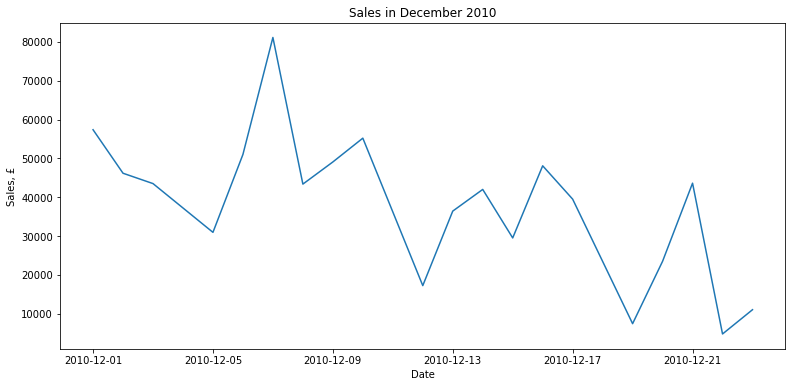

In [91]:
"""We can look at sales by dates in December 2010 to understand whether to expect another increase or there will be a decline."""
dynamics_by_day_2010_12 = (df_dropna[df_dropna.InvoiceDate < '2011-01-01'][['InvoiceDay', 'Total', 'Quantity']].
                           groupby('InvoiceDay').sum().reset_index())
plt.plot(dynamics_by_day_2010_12.InvoiceDay, dynamics_by_day_2010_12.Total)
plt.title('Sales in December 2010')
plt.xlabel('Date')
plt.ylabel('Sales, £')

In [92]:
"""Sales: 2010-12-01 08:26:00 - 2010-12-09 12:50:00"""
df_dropna[(df_dropna.Quantity > 0) & (df_dropna.InvoiceDate < '2010-12-09 12:50:00')].sum()['Total']

379977.0

In [93]:
"""Sales: 2011-12-01 08:26:00 по 2011-12-09 12:50:00"""
(df_dropna[(df_dropna.Quantity > 0) & (df_dropna.InvoiceDate >'2011-12-01 08:26:00') 
           & (df_dropna.InvoiceDate <'2011-12-09')].sum()['Total'])

417587.34

The numbers are similar. Approximately 10% growth over the same period in 2010.

ONLINE AND OFFLINE SALES DYNAMICS

In [94]:
'''Продажи онлайн и офлайн в составе общих продаж'''
df_dropna_offline = (df_dropna[df_dropna.CustomerID == 'no_info'][['InvoiceYear', 'InvoiceMonth','Total']].
                     groupby(['InvoiceYear', 'InvoiceMonth',]).sum())
df_dropna_offline = df_dropna_offline.rename(columns={'Total': 'Total_offline'})
df_dropna_online = (df_dropna[df_dropna.CustomerID != 'no_info']
                    [['InvoiceYear', 'InvoiceMonth','Total']].groupby(['InvoiceYear', 'InvoiceMonth',]).sum())
df_dropna_online = df_dropna_online.rename(columns={'Total': 'Total_online'})
df_dropna_online

Total_online
InvoiceYear InvoiceMonth              
2010        12              550675.080
2011        1               472922.820
            2               435230.250
            3               575226.450
            4               422352.951
            5               651989.650
            6               642279.850
            7               581840.891
            8               614245.040
            9               924792.881
            10              962679.700
            11             1119794.790
            12              339268.970

In [95]:
df_dropna_total = df_dropna_online.join(df_dropna_offline, how='left')
df_dropna_total.head(13)

Total_online  Total_offline
InvoiceYear InvoiceMonth                             
2010        12              550675.080      210325.42
2011        1               472922.820      107693.29
            2               435230.250       65561.75
            3               575226.450      106114.19
            4               422352.951       61039.93
            5               651989.650       80773.86
            6               642279.850       83371.19
            7               581840.891       96697.64
            8               614245.040       88830.60
            9               924792.881       89562.80
            10              962679.700      100714.63
            11             1119794.790      314090.20
            12              339268.970      102305.87

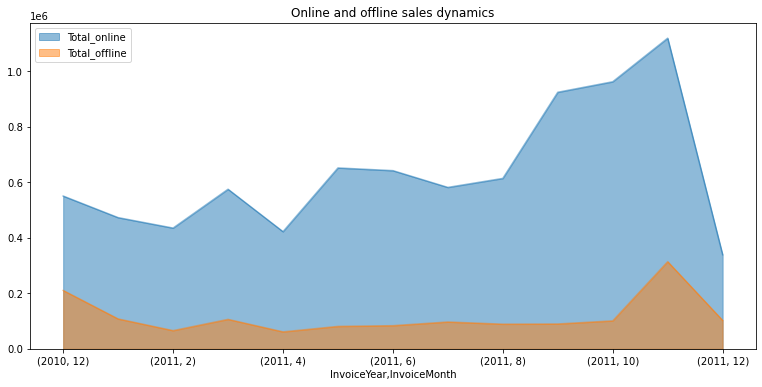

In [96]:
ax = df_dropna_total.plot(kind='area',
                             stacked=False,
                             title='Online and offline sales dynamiсs')

In [97]:
df_dropna['WeekNumber'] = df_dropna['InvoiceDate'].dt.week

MODEL: WEEKLY DYNAMICS

In [98]:
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
dynamics_by_week = (df_dropna[['InvoiceYear', 'WeekNumber','Total']].
                          groupby(['InvoiceYear', 'WeekNumber']).sum().reset_index())
dynamics_by_week.head(10)

,InvoiceYear,WeekNumber,Total
0,2010,48,178020.89
1,2010,49,297038.64
2,2010,50,202989.14
3,2010,51,82951.83
4,2011,1,125780.39
5,2011,2,185334.03
6,2011,3,130846.83
7,2011,4,117437.62
8,2011,5,119235.93
9,2011,6,100439.42


In [101]:
X = dynamics_by_week[['InvoiceYear','WeekNumber']]
y = dynamics_by_week['Total']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [103]:
X_train.shape

(37, 2)

In [104]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)
y_pred

array([ 97638.35423514, 256865.54630814,  89472.85720575, 171127.82749961,
       234181.72036272, 175210.5760143 , 265031.04333754, 244617.30076407,
       248700.04927877, 232369.05521999,  85390.10869107, 138465.83938207,
       203789.81561714, 220120.80967592, 187458.82155837, 130300.34235267])

In [106]:
model.score(X_test, y_test)

0.23872823474407767

In [107]:
from sklearn.metrics import mean_squared_error

In [108]:
mean_squared_error(y_train, model.predict(X_train))
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

43644.73155152251

In [109]:
mean_squared_error(y_test, model.predict(X_test))
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

61281.67007987274

In [110]:
X_future = np.array([[2011, 50], [2011, 51], [2012, 1], [2012, 2], [2012, 3], [2012, 4]])

In [111]:
y_future = model.predict(X_future)
y_future

array([285444.78591099, 289527.53442569, 140735.92275405, 144818.67126873,
       148901.41978343, 152984.16829813])